# Outlier Analysis

- Extreme Value Anaylsis
- Clustering models
- Distance-based models
- Density-based models
- Probabilistic models
- Information theoretic models

## Receiver Operating Characteristic (ROC)

- Plot of detection probability (TPR) vs false alarm rate (FPR)
- from (0,0) to (1,1)

Quantifying desirable performance
    Area under the curve (AUC): as close to 1 as possible
    Equal error rate (EER): miss detection rate = false alarm rate
    
Practical interpretations:
    Unavoidable trade-off between false alarm rate and detection probability
    Operating point: depends on the specific application
    

# Extreme Value Analysis

Basic statistics of attributes' values
Outliers: correspond to the statistical tails of probability distributions
    Easily seen with one-d distributions
    Can be extended to multi-d distributions
What are the tails?
    Regions of very large/small values
    Low density/less likely to be observed
    Usually correspond to density being less than a threshold
        f(x) </= theta
        Note: uni-modal vs multi-modal distributions
        
#### How to perform EVA?
- Obtain data samples
- Select suitable statistical distributions eg Gaussian
- Find distribution parameters that explain the data well
- Compute suitable test statistic
- Find threshold via look-up tables

    - Example: w/ Gaussian distribution N(u,o^2)
        - Obtain data samples x1, ... , xn
        - Estimate u with sample mean u^
        - Estimate o with sample sd o^
        - Compute Z-statistic for a given value xi
        
            - zi = (xi - u^) / o^
        - Use t statistical distribution to look up the threshold value or detect outliers when abs(zi) greater than/equal to 3 (o.o1% tail)

# Histogram-Based Techniques

Simple and easy to construct for univariate data: no need to fit a distribution model

Frequently in many application domains

How:
    - Data discretised into bins
    - Low frequency bins --> outliers
    - Score = bin count-1
Challenges/limitations
    - Optimal bin width?
    - Lack of global perspective
    - Less effective with large dimensions
    
How to extend to multivariate cases?
    - Each attribute discretised into p equal-width bins
    - Data space divided into grid regions
    - Grid regions ~ histogram bins

# Local Outlier Factor for Anomaly Detection

LOF detects outliers in the data set that may not be considered outliers elsewhere in the data set
It does so by employing a local approach...

    eg. a point somewhat close to a very dense cluster may be considered a local outlier, whilst that same distance may be considered acceptable near a more sparse cluster.
    
Only geometrically intuitive in low-dimensional vector spaces...

    but algorithm can be applied wherever dissimilarity function can be applied.

### Advantages
Performs strongly in both:

    network intrusion detection'
    pre-processed classification benchmarks
    
Easily generalisable and broadly applicable:

    Authorship networks
    Geographic data
    Video streams
    
### Disadvantages
Results are quotient values

    1 or less indicates a clear inlier, though there is no clear rule for outliers
    The locality of the method and different parameterisation approaches mean a 2 could be considered an inlier in sparse settings
    
To address disadvantages there are a number of extensions.
    
#### LOF Extensions
Feature Bagging for Outlier Detection

    improved detection on high-dimensional data
    runs LOF through different projections
    first ensemble approach for outlier detection
    
Local Outlier Probability

    Values scaled (0,1)
    Uses inexpensive statistics, becoming less sensitive to parameter-k
    
Interpreting and Unifying Outlier Scores

On Evaluation of Outlier Rankings and Scores

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from scipy.spatial import distance
from scipy.io import arff

from sklearn.neighbors import LocalOutlierFactor

Let's make some random numbers

This populates a list - RandPoints - with random (x,y) co-ords, using two separate range parameters.
It also adds the output to lists of all the x's and y's, xlist and ylist.

#### Set QTY below

### Hawkins Outlier

- An outlier is an observation that deviates so much from other observations as to arouse suspicion that it was generated by a different mechanism.

Consider this definition and maybe add something to the generator to produce one or two outliers from a different mechanism

In [2]:
random.seed(a=123)
np.random.seed([123])

# make empty lists and choose a quantity
# NB the number of data points generated is qty*3 + 1
RandPoints=[]
xlist=[]
ylist=[]
qty=2500    # qty of inliers
outprop = 0.001    # proportion of outliers
outqty=int(qty * outprop)   # qty of outliers

# lists for outliers for later plotting
xoutlist=[]
youtlist=[]

# set ranges for your two different clusters
xRange1 = (-150, 100)
yRange1 = (-150, 75)
xRange2 = (-50, 50)
yRange2 = (-100, 100)

# set mean and sd for Gauss dist
mu = -20
xsig = 50
ysig = 100
mu2= 25
xsig2= 100
ysig2= 150
# set outlier sigma multiplier and mean adj
osigmult=3
muadj=1

def addcoords():
    """ Adds x and y coords to respective lists
    for each and a list of tuples of full coords
    to RandPoints
    
    RandPoints later changed to numpy array RandArray"""
    xlist.append(x)
    ylist.append(y)
    RandPoints.append((x,y))

i=0
bonusclusters=False    
# produce data points in three separate clusters
while i<qty:
    # adding a Gaussian dist cluster3
    x = random.gauss(mu, xsig)
    y = random.gauss(mu, ysig)
    addcoords()
    # adding a Gaussian dist cluster4
    x = random.gauss(mu2, xsig2)
    y = random.gauss(mu2, ysig2)
    addcoords()
    # adding a Laplace dist cluster 5
    x = np.random.laplace(loc=10, scale=2)
    y = np.random.laplace(loc=10, scale=2)
    addcoords()
    while bonusclusters:
        # gen cluster1
        x = random.randrange(*xRange1)
        y = random.randrange(*yRange1)
        addcoords()
        # gen cluster2
        x = random.randrange(*xRange2)
        y = random.randrange(*yRange2)
        addcoords()
    i += 1

# adding an outlier to Gauss dist cluster3
while i==qty:
    for i in range(0,outqty):
        xo = random.gauss(mu+muadj, xsig*osigmult)
        yo = random.gauss(mu-muadj, ysig*osigmult)
        xlist.append(xo)
        ylist.append(yo)
        xoutlist.append(xo)
        youtlist.append(yo)
        RandPoints.append((xo,yo))

# shuffling it for the sake of it
random.shuffle(RandPoints)

# convert our RandList into a numpy array
RandArray = np.array(RandPoints)

print(len(RandPoints))

7502


Now we will plot our points on a scatter-hist plot

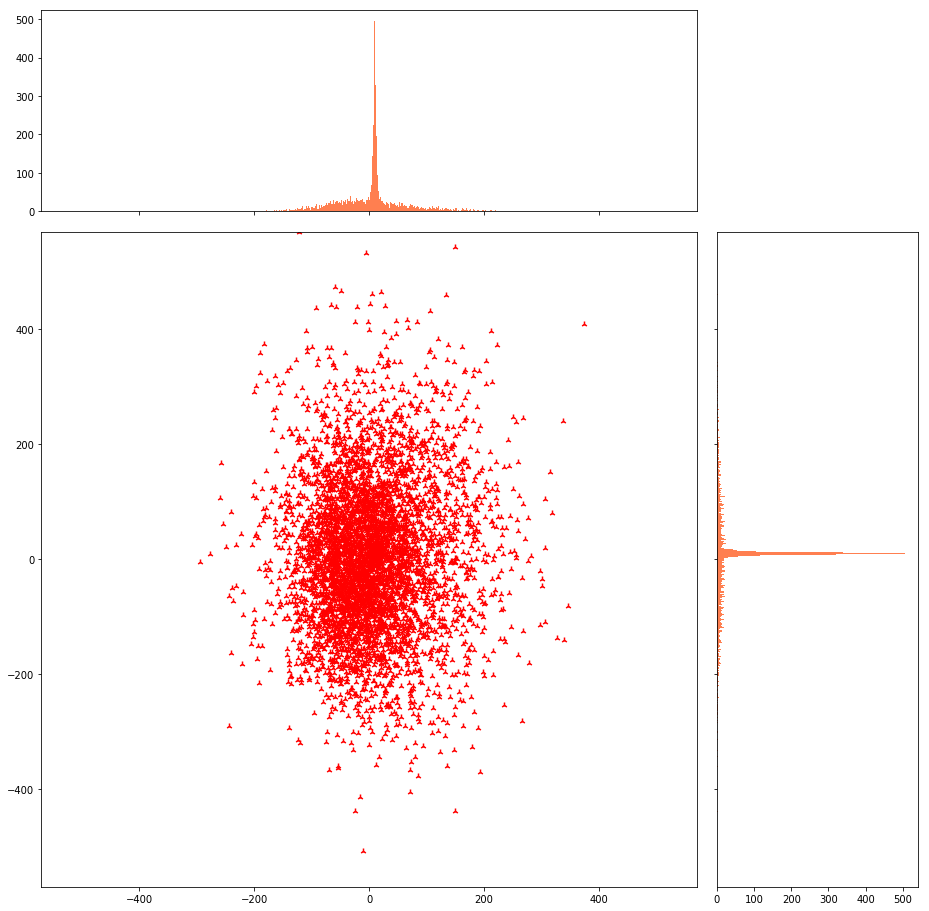

In [3]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# use null formatter to kill labels
nullfmt = NullFormatter()

plt.figure(1, figsize=(14,14))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot
axScatter.scatter(xlist, ylist, marker="2", color="red")

binwidth = 1
xymax = max(np.max(np.abs(xlist)), np.max(np.abs(ylist)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(xlist, bins=bins, color='coral')
axHisty.hist(ylist, bins=bins, orientation='horizontal', color='coral')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())


plt.show()

# Using sklearn

The following is from the scikit learn documentation for outlier detection
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

They create their own data in a different way, and because they force-generate outliers, have included a ground truth object to use to test their predictions.

In [ ]:
# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.figure(1, figsize=(14,14))
plt.suptitle('SKLEARN Example', fontsize=16)
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
# set k-parameter
knn = 20

# contamination is supposedly 'proportion of outliers'
# therefore, using outprop variable from data generation cell
myclf = LocalOutlierFactor(n_neighbors=knn, contamination=outprop)

# perform the LOF function with fit_predict, return results w/ negative_outlier_factor
preds = myclf.fit_predict(RandArray)
myScores = myclf.negative_outlier_factor_

plt.figure(1, figsize=(14,14))
plt.suptitle('My Generated Data', fontsize=16)
plt.title("Local Outlier Factor (LOF)")

plt.scatter(xlist, ylist, color='k', s=3., label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (myScores.max() - myScores) / (myScores.max() - myScores.min())
plt.scatter(xlist, ylist, s=1000 * radius, edgecolors='b',
            facecolors='none', label='Outlier scores')

# plot the outliers with a separate marker
plt.scatter(xoutlist, youtlist, color='r', marker='x', s=100)
plt.axis('tight')

# set axis lims to max x and y values
xmax = max(np.max(np.abs(xlist)))
ymax = max(np.max(np.abs(ylist)))
plt.xlim((-xmax, xmax))
plt.ylim((-ymax, ymax))

# plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Implementing/learning LOF in python

So whilst the sklearn method is nice and efficient, to learn the process and LOF as well as some python I'm going to try and implement the general algorithm as best I know how.

## Distance Calculation

In [ ]:
# checking Manhattan distance works
di = distance.cityblock(RandArray[0], RandArray[1])
print("Instance 1: " + str(RandArray[0]), "\nInstance 2: " + str(RandArray[1]), "\nDistance: " + str(di))

In [ ]:
# it did, so may as well make a distance check function
def distcheck(first, second):
    dis = distance.cityblock(RandArray[first], RandArray[second])
    print("Instance 1: " + str(RandArray[first]), "\nInstance 2: " + str(RandArray[second]), "\nDistance: " + str(dis))

In [ ]:
distcheck(0,3)

In [ ]:
# assign length of array variable and init empty distances list
length = len(RandArray)
distances=[]

# use count=0 for recording data indices
count=0
for data in RandArray:            # for each data point in RandArray
    for i in range(0,length):     # for as many times as there are data points
        dist=distance.cityblock(data, RandArray[i]) # calc the Man distance between the data point and RandArray[i]
        if dist !=0:              # eliminate distance-to-self instances
            distances.append((count, i, dist)) # returns indices of both data points and distance
    count+=1

distances

### kth Nearest Neighbour Distance Calculation

### k Nearest Neighbour Calculation

### Local Reachability Density Calculation

### Local Outlier Factor Calculation

Playing with datasets from an outlier detetion methods eval paper

http://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/#ref1

In [ ]:
iondata = arff.loadarff('outlier_datasets/Ionosphere/Ionosphere_withoutdupl_norm.arff')

In [ ]:
iondata